# Details on the tempo module

**For a description on how to use the most important functionality, please checkout the tutorials and the API documentation.**

The following example code shows how to use most of the functionality of the `tempo.tempo` module. This code is *suplementary* to the documentation and also includes functionality that is only relevant to the inner workings of the TimeEvolvingMPO package. Sections that show example code that is not part of the API is marked with three asterix `***`.

**Contents:**

* A: Simple example
    * A1: tempo_compute()
    * A2: TempoParameters class
    * A3: Tempo class

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt

import time_evolving_mpo as tempo


## A: Simple Example

In [2]:
initial_state_A = tempo.operators.spin_dm("up")

Create a bath:

In [3]:
coupling_operator_A = 0.5 * tempo.operators.sigma("z")
correlations_A = tempo.PowerLawSD(alpha=0.1, 
                                  zeta=1.0, 
                                  cutoff=5.0, 
                                  cutoff_type="exponential", 
                                  temperature=0.1, 
                                  name="ohmic")
bath_A = tempo.Bath(coupling_operator_A, correlations_A, name="phonon bath")

Create a system:

In [4]:
system_A = tempo.System(0.5*tempo.operators.sigma("x"),
                        gammas=[0.1],
                        lindblad_operators=[tempo.operators.sigma("z")]
                       )

### A1: tempo_compute()

In [5]:
dyn_A1 = tempo.tempo_compute(system_A,
                             bath_A, 
                             initial_state_A, 
                             start_time=0.0, 
                             end_time=10.0, 
                             tollerance=0.00001)

  3.0%    6 of  200 [#---------------------------------------] 00:00:00

../time_evolving_mpo/tempo.py:417: UserWarning: Estimating parameters for TEMPO calculation. No guarantie that resulting TEMPO calculation converges towards the correct dynamics! Please refere to the TEMPO documentation and check convergence by varying the parameters for TEMPO manually.
  warnings.warn(GUESS_WARNING_MSG, UserWarning)
../time_evolving_mpo/tempo.py:419: UserWarning: This is just a placeholder and not really implemented yet.
  warnings.warn(PLACEHOLDER_MSG, UserWarning)


100.0%  200 of  200 [########################################] 00:00:06
Elapsed time: 6.6s


Text(0, 0.5, '<$\\sigma_z$>')

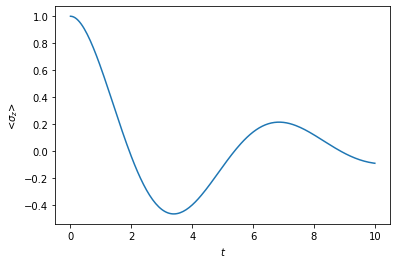

In [6]:
plt.plot(*dyn_A1.expectations(tempo.operators.sigma("z"), real=True))
plt.xlabel(r"$t$")
plt.ylabel(r"<$\sigma_z$>")

### A2: TempoParameters class

In [7]:
tempo_params_A2 = tempo.TempoParameters(dt=0.05, dkmax=30, epsrel=2**(-25))

In [8]:
print(tempo_params_A2)

----------------------------------------------
TempoParameters object: __unnamed__
 __no_description__
  dt            = 0.05 
  dkmax         = 30 
  epsrel        = 2.9802322387695312e-08 



In [9]:
dyn_A2 = tempo.tempo_compute(system_A,
                             bath_A,
                             initial_state_A,
                             start_time=0.0, 
                             end_time=5.0,
                             parameters=tempo_params_A2)

100.0%  100 of  100 [########################################] 00:00:08
Elapsed time: 8.1s


Text(0, 0.5, '<$\\sigma_z$>')

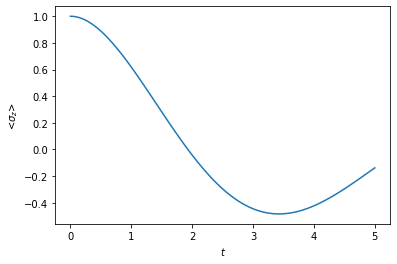

In [10]:
plt.plot(*dyn_A2.expectations(tempo.operators.sigma("z"), real=True))
plt.xlabel(r"$t$")
plt.ylabel(r"<$\sigma_z$>")

### A3: Tempo class

In [11]:
tempo_param_A3 = tempo.TempoParameters(dt=0.05, dkmax=20, epsrel=2**(-15))

In [12]:
tempo_A = tempo.Tempo(system_A,
                      bath_A,
                      tempo_param_A3,
                      initial_state_A,
                      start_time=0.0)

In [25]:
tempo_A.compute(end_time=4.0, progress_type='silent')

In [14]:
tempo_A.compute(end_time=4.111, progress_type='simple')

Step     1 of     2,  total time:       0.0s (+    0.04s)
Step     2 of     2,  total time:       0.1s (+    0.03s)
Step     3 of     2,  total time:       0.1s (+    0.03s)
Step     3 of     2,  total time:       0.1s (+    0.00s)
Total elapsed time:        0.1s


In [23]:
tempo_A.compute(end_time=5.0, progress_type='bar')

100.0%    0 of    0 [########################################] 00:00:00
Elapsed time: 0.0s


In [16]:
dyn_A3 = tempo_A.get_dynamics()

Text(0, 0.5, '<$\\sigma_z$>')

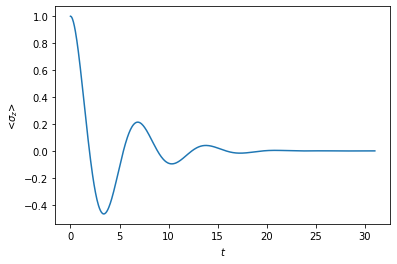

In [22]:
plt.plot(*dyn_A3.expectations(tempo.operators.sigma("z"), real=True))
plt.xlabel(r"$t$")
plt.ylabel(r"<$\sigma_z$>")

In [18]:
print(dyn_A3)
for key, value in dyn_A3.description_dict.items():
    print("{:35s} = \t{}".format(key,value))

----------------------------------------------
Dynamics object: computed from '__unnamed__' tempo
 __no_description__
  length        = 201 timesteps 
  min time      = 0.0 
  max time      = 10.0 

tempo_type                          = 	<class 'time_evolving_mpo.tempo.Tempo'>
tempo_name                          = 	__unnamed__
tempo_description                   = 	__no_description__
tempo_description_dict              = 	{}
parameters_type                     = 	<class 'time_evolving_mpo.tempo.TempoParameters'>
parameters_name                     = 	__unnamed__
parameters_description              = 	__no_description__
parameters_description_dict         = 	{}
system_type                         = 	<class 'time_evolving_mpo.system.System'>
system_name                         = 	__unnamed__
system_description                  = 	__no_description__
system_description_dict             = 	{}
bath_type                           = 	<class 'time_evolving_mpo.bath.Bath'>
bath_name             